## **Multinomial Naïve Bayes Classifier - The Youtube Dataset** 

**Context and Objective:** In this use case, we will explore a database extracted from the Youtube website. This database will be used to build multinomial Naïve Bayes classifier capable of filtering spam messages and ham messages. 

**Datasets:**  
The database contains five CSV files, each with a set of comments from five Youtube videos. Each of the CSV files contains the following columns:  
- COMMENT_ID: Id of the comment.  
- AUTHOR: The author of the comment.   
- DATE: Date of the comment.  
- CONTENT: The text of the comment.  
- CLASS: The class to which the comment belongs. 0 designates a harmless ham comment, while 1 designates a spam. 

Our task is to analyse the data from all five CSV files and train our algorithm to make good predictions on new data.  

**Note:** This code was written on Jupyter Notebook.  
**Language:** Python.  
**Packages:** numpy, pandas, glob, sklearn, matplotlib, seaborn.
 

**Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import glob

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

**Reading the database**

In [2]:
files = glob.glob('C:/Users/Aylan/Documents/IT/Datasets/youtube-dataset\\*.csv') # read the database
files # print the content of files

['C:/Users/Aylan/Documents/IT/Datasets/youtube-dataset\\Youtube01.csv',
 'C:/Users/Aylan/Documents/IT/Datasets/youtube-dataset\\Youtube02.csv',
 'C:/Users/Aylan/Documents/IT/Datasets/youtube-dataset\\Youtube03.csv',
 'C:/Users/Aylan/Documents/IT/Datasets/youtube-dataset\\Youtube04.csv',
 'C:/Users/Aylan/Documents/IT/Datasets/youtube-dataset\\Youtube05.csv']

In [3]:
# create an empty list in which we store all the datasets
all_df = []
for i in files:
  all_df.append(pd.read_csv(i))

# display the first dataset
all_df[0]

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc,Jason Haddad,2013-11-26T02:55:11,"Hey, check out my new website!! This site is a...",1
...,...,...,...,...,...
344,z13th1q4yzihf1bll23qxzpjeujterydj,Carmen Racasanu,2014-11-14T13:27:52,How can this have 2 billion views when there's...,0
345,z13fcn1wfpb5e51xe04chdxakpzgchyaxzo0k,diego mogrovejo,2014-11-14T13:28:08,I don't now why I'm watching this in 2014﻿,0
346,z130zd5b3titudkoe04ccbeohojxuzppvbg,BlueYetiPlayz -Call Of Duty and More,2015-05-23T13:04:32,subscribe to me for call of duty vids and give...,1
347,z12he50arvrkivl5u04cctawgxzkjfsjcc4,Photo Editor,2015-06-05T14:14:48,hi guys please my android photo editor downloa...,1


In [4]:
# for our Naïve Bayes classifier we'll only need the two columns "CONTENT" and "CLASS"
# we can remove the following columns "COMMENT_ID", "AUTHOR" and "DATE"
all_df_updated = []
for data in all_df:
  all_df_updated.append(data.drop(["COMMENT_ID", "AUTHOR", "DATE"], axis = 1))

# display the first dataset
all_df_updated[0]

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,"Hey, check out my new website!! This site is a...",1
...,...,...
344,How can this have 2 billion views when there's...,0
345,I don't now why I'm watching this in 2014﻿,0
346,subscribe to me for call of duty vids and give...,1
347,hi guys please my android photo editor downloa...,1


In [5]:
# combine all the five datasets into one single dataframe
data_combined = pd.concat(all_df_updated, axis = 0, ignore_index = True)

# display the combined dataset
data_combined.head()

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,"Hey, check out my new website!! This site is a...",1


In [6]:
# check for missing values
data_combined.isnull().sum()

CONTENT    0
CLASS      0
dtype: int64

In [7]:
# let's count the number of values for each class in this dataset
data_combined['CLASS'].value_counts()

1    1004
0     951
Name: CLASS, dtype: int64

**Insight:**  
The class 1 reprensents the number of spam messages and class 0 represents the number of ham messages. The number of spam messages is 1004 and the number of ham messages is 951.  
This is good for our model since the data is almost perfectly balanced.

**Data preprocessing**

In [8]:
# assign the "CONTENT" column into a variable named inputs
inputs = data_combined["CONTENT"]

# assign the "CLASS" column into a variable named target
target = data_combined["CLASS"]

In [9]:
inputs

0       Huh, anyway check out this you[tube] channel: ...
1       Hey guys check out my new channel and our firs...
2                  just for test I have to say murdev.com
3                 watch?v=vtaRGgvGtWQ   Check this out .﻿
4       Hey, check out my new website!! This site is a...
                              ...                        
1950    I love this song because we sing it at Camp al...
1951    I love this song for two reasons: 1.it is abou...
1952                                                  wow
1953                              Shakira u are so wiredo
1954                           Shakira is the best dancer
Name: CONTENT, Length: 1955, dtype: object

In [10]:
# split the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(inputs, target, 
                                                    test_size = 0.2,
                                                    random_state = 365,
                                                    stratify = target) 

In [11]:
# verify the proportions of y_train and y_test datasets
y_train.value_counts(normalize = True) 

1    0.513427
0    0.486573
Name: CLASS, dtype: float64

In [12]:
y_test.value_counts(normalize = True)

1    0.514066
0    0.485934
Name: CLASS, dtype: float64

In [13]:
# convert the text of the "CONTENT" column into a matrix of tokens for both X_train and X_test
vectorizer = CountVectorizer()
X_train_transf = vectorizer.fit_transform(X_train)
X_test_transf = vectorizer.transform(X_test)

# print X_train_transf
X_train_transf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
# print shape of X_train_transf
print(X_train_transf.shape)

# print shape of X_test_transf
print(X_test_transf.shape)

(1564, 3925)
(391, 3925)


**Insight:**  
- The number of rows for X_train_transf is 1564 and 391 for X_test_transf.  
- The number of words is 3822 for both X_train_transf and X_test_transf.

**Classification**

In this section, we will build our Naïve Bayes classifier. The sklearn library offers a variety of classifiers: Gaussian, Bernoulli, Categorical, Complement and Multinomial.  
The complement and multinomial classifiers are the ones best-suited for text classification. The complement claissifier handles better imballanced data. Our data analysis revealed that our data is rather balanced, so in our case we'll use the multinomial classifier. 

In [15]:
# perform the classification
clf = MultinomialNB()
clf.fit(X_train_transf, y_train)

MultinomialNB()

In [16]:
# get the parameters to be used for this classifier
clf.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

- The 'alpha' parameter: it is worth exploring how this classifier deals with unknown features, that is, data seen in the test data but not in the training data. When we have such a case, we introduce a smoothing parameter called alpha. The purpose of this parameter is to give each word a miminum count which is alpha in order to avoid the conditional probability to be zero in some cases. If the count of a word is non-zero, then the updated count becomes the old one + alpha. In this way, the conditional probability of each word can never be zero. By default this parameter is set to 1 in sklearn.  
- The 'class_prior' parameter: this parameter is used to set specific values for prior probabilities. Otherwise, the priors are adjusted accordingly to the training data. 
- The 'fit-prior' parameter: this is a boolean parameter that asks whether to learn the prior probabilities. If the parameter is set to False, sklearn adopts a uniform prior. 

**Performing the evaluation on the test dataset**

In [17]:
# create the predictions
y_test_pred = clf.predict(X_test_transf)

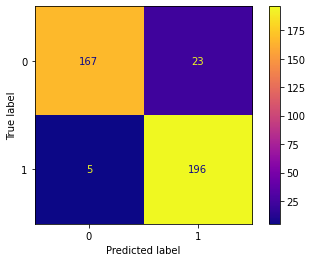

In [18]:
# create a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred,
                                        labels = clf.classes_,
                                        cmap = "plasma"
                                        )

- True negatives: 167
- False positives: 23
- False negatives: 5
- True positives: 196

In [19]:
# print the classification report
print(classification_report(y_test, y_test_pred, target_names = ["Ham", "Spam"]))

              precision    recall  f1-score   support

         Ham       0.97      0.88      0.92       190
        Spam       0.89      0.98      0.93       201

    accuracy                           0.93       391
   macro avg       0.93      0.93      0.93       391
weighted avg       0.93      0.93      0.93       391



**Insights:**
- The accuracy of our model is 92%. This confirms the results shown by the confusion matrix.
- The precision for the "Ham" class is 96% while the precision for the "Spam" class is 89%.
- The recall for the "Ham" class is 87% and 97% for the "Spam" class.
- The F1-score is 91% and 92% for the "Ham" ans "Spam" classes respectively. The F1-score penalizes low values for precision and recall but it does not for our model. This is because the difference between the lowest and highest values for precision and recall in each class are not significant. 

**Plotting probability distribution figures**

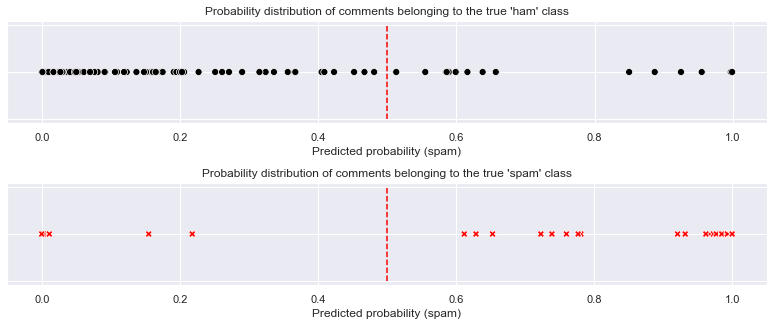

In [20]:
spam_proba = clf.predict_proba(X_test_transf).round(3)[:,1];
df_scatter = pd.DataFrame()

sns.set()
df_scatter['True class'] = y_test
df_scatter['Predicted class'] = y_test_pred
df_scatter['Predicted probability (spam)'] = spam_proba

df_scatter = df_scatter.reset_index(drop = True)

palette_0 = sns.color_palette(['#000000'])
palette_1 = sns.color_palette(['#FF0000'])

df_scatter_0 = df_scatter[df_scatter['True class'] == 0].reset_index(drop = True)
df_scatter_1 = df_scatter[df_scatter['True class'] == 1].reset_index(drop = True)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,5))
fig.tight_layout(pad = 3)

sns.scatterplot(x = 'Predicted probability (spam)', 
                y = np.zeros(df_scatter_0.shape[0]), 
                data = df_scatter_0,
                hue = 'True class', 
                s = 50,
                markers = ['o'],
                palette = palette_0,
                style = 'True class',
                legend = False, 
                ax = ax1).set(yticklabels=[])

ax1.set_title('Probability distribution of comments belonging to the true \'ham\' class')
ax1.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');

sns.scatterplot(x = 'Predicted probability (spam)', 
                y = np.zeros(df_scatter_1.shape[0]), 
                hue = 'True class', 
                data = df_scatter_1,
                s = 50,
                palette = palette_1,
                markers = ['X'],
                style = 'True class',
                legend = False, 
                ax = ax2).set(yticklabels=[])

ax2.set_title('Probability distribution of comments belonging to the true \'spam\' class')
ax2.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');

The x-axis of the two graphs above represent the probability of a comment belonging to the "spam" class. The comments with a probability lower than 0.5 are classified as "Ham", and the comments with a probability higher than 0.5 are classified as "Spam" comments. The vertical dash red line represents the probability equal to 0.5. The black dots show the samples belonging to the true "Ham" class, while the red crosses show the samples belonging to the true "Spam" class. I decided to plot them in two different figures to avoid overlapping the two classes. This graph is an alternative to the confusions matrix to evaluate graphically the performance of our model.

**Optimizing our algorithm**

We can try to improve our model by adjusting the prior probabilities of the multinomial Naïve Bayes algorithm. By default, the algorithm determines these probabilities based on the training data which in this case consisted of the same number of ham and spam comments. So, our classifier assigned the same prior probabilities that are approximately of same proportion: P(ham) ≈ P(spam) ≈ 50%.
Assumption: let's assume that P(ham) > P(spam). This translates the idea that most Youtube users are well intentioned and post more ham comments than spam comments. 

In [21]:
# check the current log priors using the class_log_prior_ attribute
np.exp(clf.class_log_prior_)

array([0.48657289, 0.51342711])

In [22]:
# the priors turn out to be 49% for the ham class and 51% for the spam class
# let's change the priors by providing an argument to the Naïve Bayes model
clf = MultinomialNB(class_prior = np.array([0.6, 0.4])) # this will increase the prior to 60% for the ham class and decrease it to 40% to the spam class
clf.fit(X_train_transf, y_train)

# make the predictions
y_test_pred = clf.predict(X_test_transf)

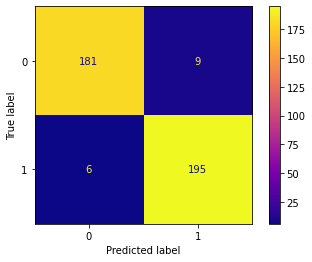

In [23]:
# display the confusion matrix
sns.reset_orig()
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred,
                                        labels = clf.classes_,
                                        cmap = "plasma")

- True negatives: 181
- False positives: 9
- False negatives: 6
- True positives: 195

We can see that the number of falsely predicted spams has decreased from 23 to 9, and the number of correctly predicted hams has increased from 167 to 181. 

In [24]:
# print the classification report
print(classification_report(y_test, y_test_pred, target_names = ["Ham", "Spam"]))

              precision    recall  f1-score   support

         Ham       0.97      0.95      0.96       190
        Spam       0.96      0.97      0.96       201

    accuracy                           0.96       391
   macro avg       0.96      0.96      0.96       391
weighted avg       0.96      0.96      0.96       391



- We can see that the number of falsely predicted spams has decreased from 25 to 16, and the number of correctly predicted hams has increased from 165 to 174.
- The accuracy of our optimized model has increased by 2% with 94% compared to 92%.
- The F1-score is also better for both "Ham" and "Spam" classes.

**Making predictions**  

This is the last task in which we will test our algorithm by predicting our own comments.


In [25]:
# write a comment and tokenize it using the vectorizer class
comment = vectorizer.transform(['This song is wonderful! I love it.',
                                'You can win 1m euros right now, just click here!!!'])

# predict the data
clf.predict(comment)

array([0, 1], dtype=int64)

Our algorithm classified correctly the first and second comments as ham and spam respectively.